# belosgraficos instagram.com/belosgraficos/

#### Notebook para a criação do gráfico sobre utilização da internet na América do Sul

### Comentários estão em português - Comments are in Portuguese

## Notebook criado utilizando o Kaggle
#### Dados extraidos do Gapminder: https://www.gapminder.org/data/

Importando as bibliotecas necessarias para a execução do código

In [4]:
# Verifica se a biblioteca já está instanada, caso não estiver, instala a biblioteca
if("dplyr" %in% rownames(installed.packages()) == FALSE) {install.packages("dplyr")}
if("ggthemes" %in% rownames(installed.packages()) == FALSE) {install.packages("ggthemes")}
if("png" %in% rownames(installed.packages()) == FALSE) {install.packages("png")}
if("readr" %in% rownames(installed.packages()) == FALSE) {install.packages("readr")}
if("reshape2" %in% rownames(installed.packages()) == FALSE) {install.packages("reshape2")}

library(reshape2)
library(dplyr)
library(ggplot2)
library(png)
library(ggthemes)
library(tidyr)
library(readr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘tidyr’


The following object is masked from ‘package:reshape2’:

    smiths




Lendo o arquivo de dados

In [5]:
# Lendo o arquivo CSV - Atenção para o caminho do arquivo
file_path = '../input/gapminder-non-net-users-prc/gapminder_non_net_users_prc.csv'
dataset <- read_csv(file_path)
head(dataset)


── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  country = col_character()
)
ℹ Use `spec()` for the full column specifications.




country,1990,1991,1992,1993,1994,1995,1996,1997,1998,⋯,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,1,1,1,1,1,1.000,NA,NA,NA,⋯,0.960,0.950,0.945,0.941,0.930,0.9170,0.8880,0.8650,0.8650,0.8650
Albania,1,1,1,1,1,1.000,1.000,1.000,0.999,⋯,0.550,0.510,0.453,0.428,0.399,0.3680,0.3360,0.2810,0.2810,0.3040
Algeria,1,1,1,1,1,1.000,1.000,1.000,1.000,⋯,0.875,0.851,0.818,0.775,0.705,0.6180,0.5700,0.5230,0.4040,0.4040
Andorra,1,1,1,1,1,1.000,0.985,0.970,0.931,⋯,0.190,0.190,0.136,0.060,0.041,0.0309,0.0207,0.0843,0.0843,0.0843
Angola,1,1,1,1,1,1.000,1.000,1.000,1.000,⋯,0.972,0.969,0.935,0.911,0.786,0.8760,0.8700,0.8570,0.8570,0.8570
Antigua and Barbuda,1,1,1,1,1,0.978,0.971,0.965,0.959,⋯,0.530,0.480,0.420,0.366,0.322,0.3000,0.2700,0.2400,0.2400,0.2400


Preparando os dados para a criação do gráfico

In [6]:
# Selecionando apenas os países da américa do sul
internet <- dataset %>%
            filter(country %in% c('Argentina',
                                  'Uruguay',
                                  'Paraguay',
                                  'Brazil',
                                  'Colombia',
                                  'Venezuela',
                                  'Chile',
                                  'Ecuador',
                                  'Peru',
                                  'Guyana',
                                  'Suriname'))
# Verificando os dados
internet

country,1990,1991,1992,1993,1994,1995,1996,1997,1998,⋯,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Argentina,1,1,1,1.000,1.000,0.999,0.999,0.997,0.992,⋯,0.550,0.490,0.442,0.401,0.353,0.320,0.290,0.257,0.257,0.257
Brazil,1,1,1,1.000,1.000,0.999,0.995,0.992,0.985,⋯,0.594,0.543,0.514,0.490,0.455,0.417,0.391,0.325,0.325,0.325
Chile,1,1,1,0.999,0.999,0.997,0.993,0.989,0.983,⋯,0.550,0.478,0.450,0.420,0.389,0.234,0.164,0.177,0.177,0.177
Colombia,1,1,1,1.000,0.999,0.998,0.997,0.995,0.989,⋯,0.635,0.596,0.510,0.483,0.474,0.441,0.419,0.377,0.377,0.350
Ecuador,1,1,1,1.000,1.000,1.000,0.999,0.999,0.999,⋯,0.710,0.686,0.649,0.597,0.544,0.511,0.459,0.427,0.427,0.427
Guyana,1,1,1,1.000,1.000,1.000,0.999,0.999,0.997,⋯,0.701,0.700,0.695,0.690,0.680,0.660,0.643,0.627,0.627,0.627
Paraguay,1,1,1,1.000,1.000,1.000,1.000,0.999,0.998,⋯,0.802,0.752,0.707,0.631,0.570,0.503,0.466,0.389,0.350,0.315
Peru,1,1,1,1.000,1.000,1.000,0.998,0.996,0.988,⋯,0.652,0.640,0.618,0.608,0.598,0.591,0.545,0.513,0.475,0.400
Suriname,1,1,1,1.000,1.000,0.999,0.998,0.990,0.983,⋯,0.684,0.680,0.653,0.626,0.599,0.572,0.546,0.510,0.510,0.510


In [7]:
# Para trabalharmos de forma mais facil com esse dataset, precisamos diminuir suas dimensões, então vamos "derreter" as variaveis dos anos em uma única coluna
internet_melted <- internet %>%
                   gather(key = 'ano', value = "acesso", '1990':'2019', as.numeric()) 
internet_melted[,2] <- sapply(internet_melted[,2], as.numeric)

# Verificando os dados
head(internet_melted)
tail(internet_melted)

country,ano,acesso
<chr>,<dbl>,<dbl>
Argentina,1990,1
Brazil,1990,1
Chile,1990,1
Colombia,1990,1
Ecuador,1990,1
Guyana,1990,1


country,ano,acesso
<chr>,<dbl>,<dbl>
Guyana,2019,0.627
Paraguay,2019,0.315
Peru,2019,0.400
Suriname,2019,0.510
Uruguay,2019,0.231
Venezuela,2019,0.280


Criando o gráfico

Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”
Warning message:
“Removed 99 row(s) containing missing values (geom_path).”


png 
  2

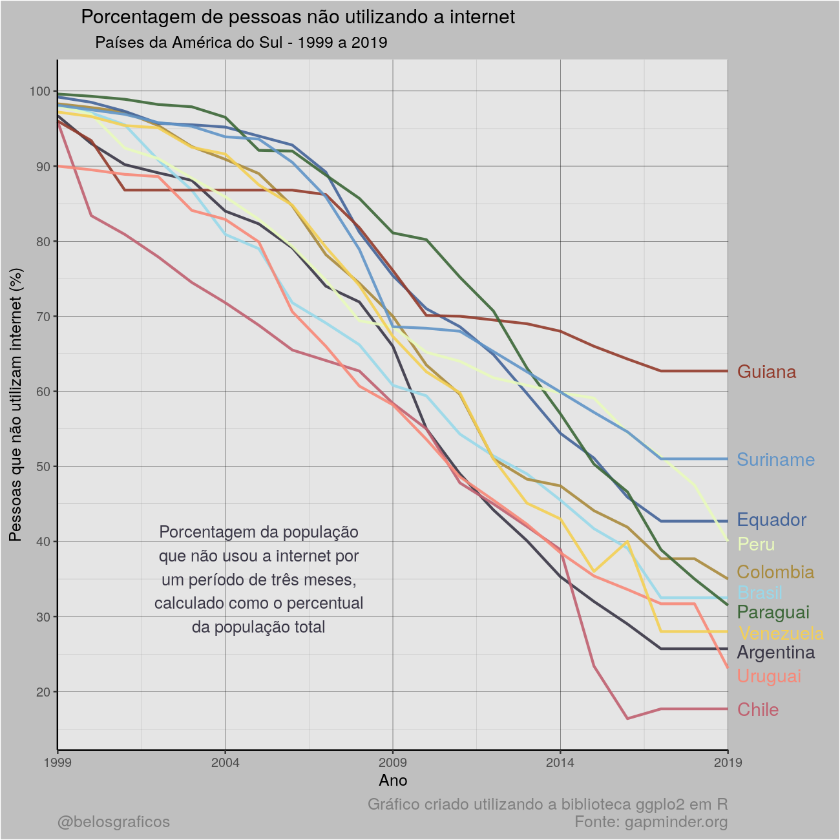

In [101]:
# Criando uma paleta de corres personalizada para o gráfico
paletta = c('#3a3746', '#99d9ea', '#c06170', '#a98b3d', '#446499',
            '#933c2d', '#3c6738', '#e9fabc', '#6194c7', '#f88878', '#f4d055')

# Criando uma imagem
png("internet_access_ggplot.png", width = 1300, height = 1300)

# Informando os dados para o plot
ggplot(internet_melted, aes(x = ano, y = acesso, color = country)) +

# Adiciona uma cama da de gráfico de linha
geom_line(size = 2, alpha = 0.9) +

# Definindo o tema
theme_classic(base_size = 25) +

# Editando elementos do tema
theme(legend.position = "", # Remove a legenda
        legend.title = element_blank(),
        legend.text = element_text(size = 32),
        legend.background = element_rect(fill = "gray85"),
    
        # Definindo títulos, subtítulos e nota de rodapé
        plot.title = element_text(hjust = 0.1),
        plot.subtitle = element_text(hjust = 0.1),
        plot.caption = element_text(color = 'gray50', hjust = c(0,1), size = 25),
      
        # Definindo elementos do fundo
        plot.background = element_rect(fill = "gray75"),
        panel.background = element_rect(size = 0.2, fill = "gray90"),
        panel.grid.major = element_line(size = 0.2, linetype = 'solid', colour = "black"),
        panel.grid.minor = element_line(size = 0.1, linetype = 'solid', colour = "gray50"),
      
        # Aumenta margem para a legenda personalizada
        plot.margin = unit(c(1,12,1,1), "lines")) +

# Define as cores
scale_color_manual(values = paletta) +

# Configurações do eixo X
scale_x_continuous(breaks = seq(1999,2019, by = 5), limits = c(1999,2019)) +
coord_cartesian(xlim = c(1999.9, 2018.1), clip = 'off') +

# Configurações do eixo Y
scale_y_continuous(breaks = seq(0,1, by = 0.1), label = seq(0,100, by = 10)) +

# Labels dos eixos, título, subtítulo e nota de rodapé
labs(x = "Ano", 
     y = "Pessoas que não utilizam internet (%)", 
     title = "Porcentagem de pessoas não utilizando a internet",
     subtitle = "Países da América do Sul - 1999 a 2019",
     caption = c("\n@belosgraficos","Gráfico criado utilizando a biblioteca ggplo2 em R\nFonte: gapminder.org")) +

# Anotações de texto de cada país
annotate("text",
         x = 2019, 
         y = 0.257-0.004,
         label = '  Argentina',
         hjust = 0.02, size = 10, color = paletta[1]) +
annotate("text",
         x = 2019, 
         y = 0.325+0.007,
         label = '  Brasil',
         hjust = 0.02, size = 10, color = paletta[2]) +
annotate("text",
         x = 2019, 
         y = 0.177,
         label = '  Chile',
         hjust = 0.02, size = 10, color = paletta[3]) +
annotate("text",
         x = 2019, 
         y = 0.350+0.01,
         label = '  Colombia',
         hjust = 0.02, size = 10, color = paletta[4]) +
annotate("text",
         x = 2019, 
         y = 0.427+0.003,
         label = '  Equador',
         hjust = 0.02, size = 10, color = paletta[5]) +
annotate("text",
         x = 2019, 
         y = 0.627,
         label = '  Guiana',
         hjust = 0.02, size = 10, color = paletta[6]) +
annotate("text",
         x = 2019, 
         y = 0.315-0.008,
         label = '  Paraguai',
         hjust = 0.02, size = 10, color = paletta[7]) +
annotate("text",
         x = 2019, 
         y = 0.4-0.003,
         label = '  Peru',
         hjust = 0.02, size = 10, color = paletta[8]) +
annotate("text",
         x = 2019, 
         y = 0.51,
         label = '  Suriname',
         hjust = 0.02, size = 10, color = paletta[9]) +
annotate("text",
         x = 2019, 
         y = 0.231-0.01,
         label = '  Uruguai',
         hjust = 0.02, size = 10, color = paletta[10]) +
annotate("text",
         x = 2019, 
         y = 0.28-0.002,
         label = '  Venezuela',
         hjust = 0, size = 10, color = paletta[11]) +

# Anotação explicativa
annotate("text",
         x = 2005, 
         y = 0.35,
         label = 'Porcentagem da população\nque não usou a internet por\num período de três meses,\ncalculado como o percentual\nda população total',
         hjust = 0.5, vjust = 0.5, size = 9, color = paletta[1])

# Finaliza o gráfico e salva a figura
dev.off()
img <- readPNG("internet_access_ggplot.png")
grid::grid.raster(img)